In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
df =pd.read_csv("/gdrive/Shareddrives/FYP Project/Dataset/FoodData_modified.csv")

In [4]:
df.describe()

,Glycemic index,Calories (kcal),Net Carbs ( grams),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),Fiber (g),Calcium (mg),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
count,550.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,485.000000,581.000000,621.000000,...,427.000000,428.000000,426.000000,601.000000,597.000000,590.000000,590.000000,112.000000,184.000000,343.000000
mean,35.363636,216.998403,19.527412,8.220064,10.756198,22.770831,19.541757,9.053361,3.479174,107.190016,...,0.457611,0.521425,0.994038,30.079867,3.570285,4.307458,2.804780,12.125000,2.168859,0.124927
std,25.224070,188.224764,23.340832,9.186056,18.993655,25.012394,23.333177,16.763168,7.061645,308.883300,...,0.442380,0.511791,10.456163,87.005710,7.407209,9.187711,9.073928,18.773504,6.001451,0.863885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,60.250000,2.532500,1.202500,0.300000,3.592500,2.532500,0.420000,0.000000,12.000000,...,0.080000,0.090000,0.040000,0.000000,0.050000,0.050000,0.090000,0.000000,0.040000,0.000000
50%,33.000000,165.500000,9.360000,4.145000,2.005000,13.050000,9.375000,2.500000,1.500000,30.000000,...,0.320000,0.320000,0.160000,0.000000,0.600000,0.595000,0.450000,1.745000,0.490000,0.000000
75%,54.000000,327.000000,28.497500,13.370000,13.887500,33.457500,28.497500,8.550000,3.300000,91.000000,...,0.750000,0.892500,0.460000,30.000000,3.680000,4.840000,1.922500,16.417500,1.565000,0.000000
max,104.000000,902.000000,99.980000,75.160000,100.000000,99.980000,99.980000,99.800000,70.100000,5876.000000,...,2.350000,2.310000,153.000000,1085.000000,82.480000,72.960000,153.000000,73.300000,55.600000,14.890000


In [5]:
df.columns

Index(['Name', 'Group', 'Glycemic index', 'Insulin index', 'Serving Size',
       'Acidity (Based on PRAL)', 'GI Category', 'Calories (kcal)',
       'Net Carbs ( grams)', 'Protein (g)', 'Fats (g)', 'Carbs (g)',
       'Net carbs (g)', 'Sugar (g)', 'Fiber (g)', 'Calcium (mg)', 'Iron (mg)',
       'Magnesium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)',
       'Vitamin D (µg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Vitamin B5 (mg)',
       'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin K (µg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='obje

In [6]:
dataset = df.drop(labels=['Insulin index', 'Serving Size', 'Acidity (Based on PRAL)', 'Net Carbs ( grams)'], axis = 1)

In [7]:
dataset

,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,medium,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,low,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,medium,272,10.75,2.42,51.88,49.68,4.62,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,low,371,5.30,15.10,53.40,51.80,NaN,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,low,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,low,12,1.10,0.17,2.23,2.23,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,93,5.60,2.12,17.31,6.31,6.30,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,281,11.86,8.20,51.42,29.82,NaN,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,32,0.33,0.52,7.44,3.64,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [8]:
dataset.dropna(subset = ['Glycemic index'], inplace=True)

In [9]:
dataset = dataset.fillna(0)

In [10]:
dataset['GI Category'] = dataset['GI Category'].map({'low':0, 'medium':1, 'high':2})

In [11]:
dataset


,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,1,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,0.00,0.00,0.00
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,0,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,0.00,0.00,0.00
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,1,272,10.75,2.42,51.88,49.68,4.62,...,0.00,0.00,0.00,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,0,371,5.30,15.10,53.40,51.80,0.00,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,0.00,0.00,0.00
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,0,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,"Tomato juice, canned, without salt added",vegetables,31.0,0,17,0.85,0.29,3.53,3.13,2.58,...,0.03,0.02,0.01,0.0,0.02,0.01,0.03,0.00,1.33,0.00
618,"Pimento, canned",vegetables,45.0,0,23,1.10,0.30,5.10,3.20,2.71,...,0.03,0.05,0.02,0.0,0.05,0.02,0.16,0.00,0.00,0.00
620,"Broccoli, chinese, cooked",vegetables,32.0,0,22,1.14,0.72,3.81,1.31,0.84,...,0.00,0.00,0.00,0.0,0.11,0.05,0.33,0.00,0.00,0.00
621,"Cabbage, napa, cooked",vegetables,32.0,0,12,1.10,0.17,2.23,2.23,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=c586829da215ce7e7143f2c229ea9a3a9522798ce1a4a86dd7810c56899ae21b
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [13]:
from minisom import MiniSom

In [14]:
target = dataset['GI Category'].values

In [15]:
label_names = {0:'low', 1:'medium', 2:'high'}

In [16]:
target

array([1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [17]:
dataset.columns

Index(['Name', 'Group', 'Glycemic index', 'GI Category', 'Calories (kcal)',
       'Protein (g)', 'Fats (g)', 'Carbs (g)', 'Net carbs (g)', 'Sugar (g)',
       'Fiber (g)', 'Calcium (mg)', 'Iron (mg)', 'Magnesium (mg)',
       'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Zinc (mg)',
       'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)', 'Vitamin D (µg)',
       'Vitamin C (mg)', 'Vitamin B1 (mg)', 'Vitamin B2 (mg)',
       'Vitamin B3 (mg)', 'Vitamin B5 (mg)', 'Vitamin B6 (mg)', 'Folate (µg)',
       'Vitamin B12 (µg)', 'Vitamin K (µg)', 'Tryptophan (mg)',
       'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)',
       'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='object')

In [18]:
train_columns = ["Calories (kcal)", 'Protein (g)','Fats (g)','Net carbs (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Vitamin E (mg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)']

In [19]:
data = dataset[train_columns]

In [20]:
data

,Calories (kcal),Protein (g),Fats (g),Net carbs (g),Carbs (g),Fiber (g),Sugar (g),Vitamin E (mg),Vitamin C (mg),Vitamin B1 (mg)
0,313,12.96,4.27,51.07,55.77,4.7,6.42,0.24,0.2,0.44
1,353,7.00,16.30,43.10,44.60,1.5,2.18,0.00,0.2,0.36
2,272,10.75,2.42,49.68,51.88,2.2,4.62,0.21,0.0,0.71
3,371,5.30,15.10,51.80,53.40,1.6,0.00,0.00,0.2,0.14
4,324,2.90,9.10,57.90,61.60,3.7,27.42,0.90,0.5,0.05
...,...,...,...,...,...,...,...,...,...,...
617,17,0.85,0.29,3.13,3.53,0.4,2.58,0.32,70.1,0.10
618,23,1.10,0.30,3.20,5.10,1.9,2.71,0.69,84.9,0.02
620,22,1.14,0.72,1.31,3.81,2.5,0.84,0.48,28.2,0.10
621,12,1.10,0.17,2.23,2.23,0.0,0.00,0.00,3.2,0.01


In [21]:
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [22]:
data

array([[ 4.76824189e-01,  4.88551725e-01, -3.53085213e-01, ...,
        -2.22110313e-01, -3.40797189e-01,  2.23077337e-05],
       [ 6.87064132e-01, -1.55668120e-01,  2.63451825e-01, ...,
        -2.78147318e-01, -3.40797189e-01, -1.22469458e-02],
       [ 2.61328248e-01,  2.49671547e-01, -4.47897642e-01, ...,
        -2.29114939e-01, -3.47235718e-01,  4.14310385e-02],
       ...,
       [-1.05267139e+00, -7.89078906e-01, -5.35022576e-01, ...,
        -1.66073307e-01,  5.60596861e-01, -5.21220198e-02],
       [-1.10523138e+00, -7.93402529e-01, -5.63210055e-01, ...,
        -2.78147318e-01, -2.44219255e-01, -6.59249301e-02],
       [ 3.24400231e-01,  8.75356805e-02, -5.34510077e-01, ...,
        -2.78147318e-01, -3.47235718e-01, -6.43912734e-02]])

In [23]:
no_of_neurons = math.floor(5*math.sqrt(np.shape(data)[0]))
no_of_neurons

117

In [24]:
# Initialization and training
n_neurons = 9
m_neurons = 13
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.6448471178758832


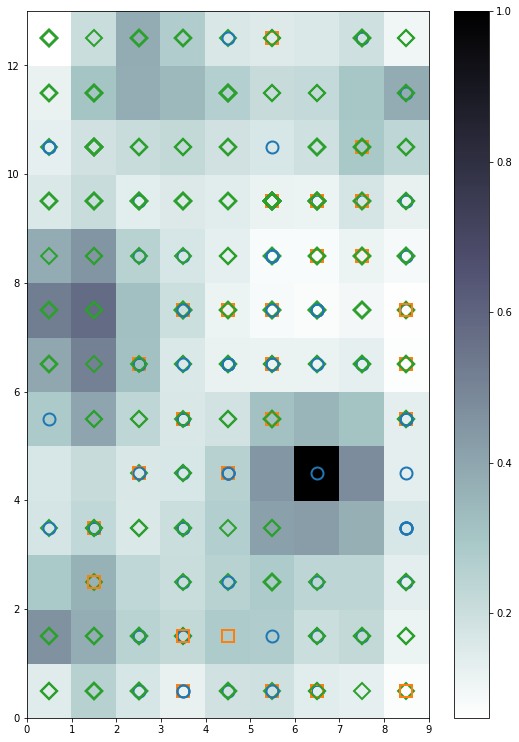

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 13))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern 
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None', markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

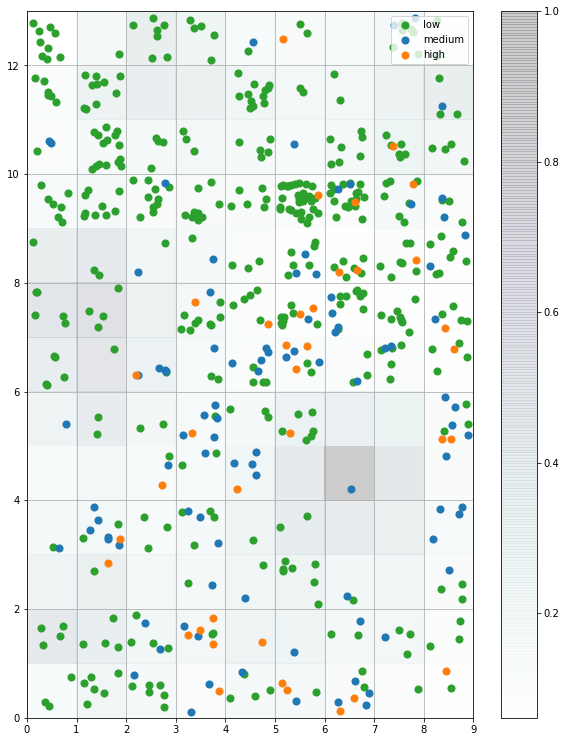

In [26]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 13))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

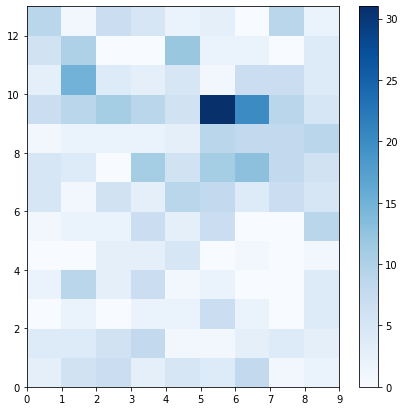

In [27]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


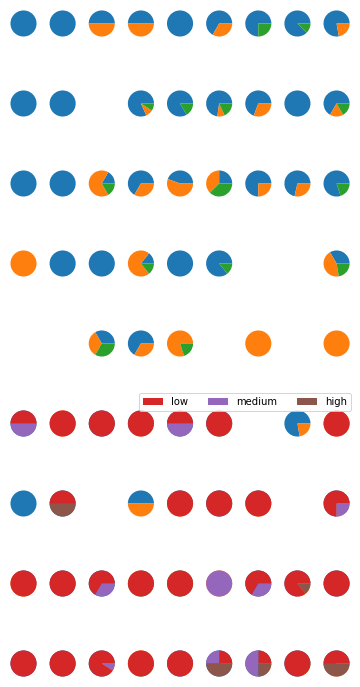

In [29]:


import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 13))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()



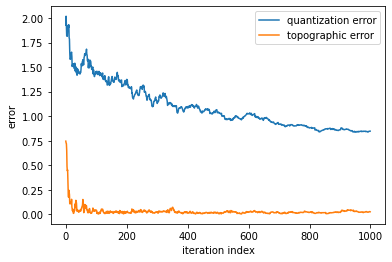

In [30]:
som = MiniSom(9, 13, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

